In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
df = pd.read_csv("/gcgl/cd4_aging_project/data/ATAC-seq/atac_preprocessing/STAR/atac_preprocessing_metrics_qc_combined.csv" )

In [3]:
df.head(4)

,Library,Total_Sequence_Counts,Weighted_Mean_GC_Content,Mean_Base_Quality,Mean_N_Content,Total_Aligned_Filtered_Reads,Picard_CATEGORY,Picard_TOTAL_READS,Picard_PF_READS,Picard_PCT_PF_READS,...,Picard_BAD_CYCLES,Picard_STRAND_BALANCE,Picard_PCT_CHIMERAS,Picard_PCT_ADAPTER,Picard_PCT_SOFTCLIP,Picard_PCT_HARDCLIP,Picard_AVG_POS_3PRIME_SOFTCLIP_LENGTH,Picard_SAMPLE,Picard_LIBRARY,Picard_READ_GROUP
0,T0101,117477516.0,57.372206,35.682572,0.005154,63878285,PAIR,107930261,107930261,1,...,0,0.500020,0.000059,0,0,0,0,NaN,NaN,NaN
1,T0102,135919198.0,57.296663,35.672784,0.005136,70842218,PAIR,125084353,125084353,1,...,0,0.500022,0.000036,0,0,0,0,NaN,NaN,NaN
2,T0103,162506002.0,56.512600,35.702815,0.005160,80805064,PAIR,150037115,150037115,1,...,0,0.500021,0.000058,0,0,0,0,NaN,NaN,NaN
3,T0104,141334694.0,55.855332,35.690804,0.005172,74520552,PAIR,130237672,130237672,1,...,0,0.500020,0.000075,0,0,0,0,NaN,NaN,NaN


FileNotFoundError: [Errno 2] No such file or directory: '/gpfs/commons/home/mmatos/cd4_chrombpnet/scripts/data/high_read_samples_hist.png'

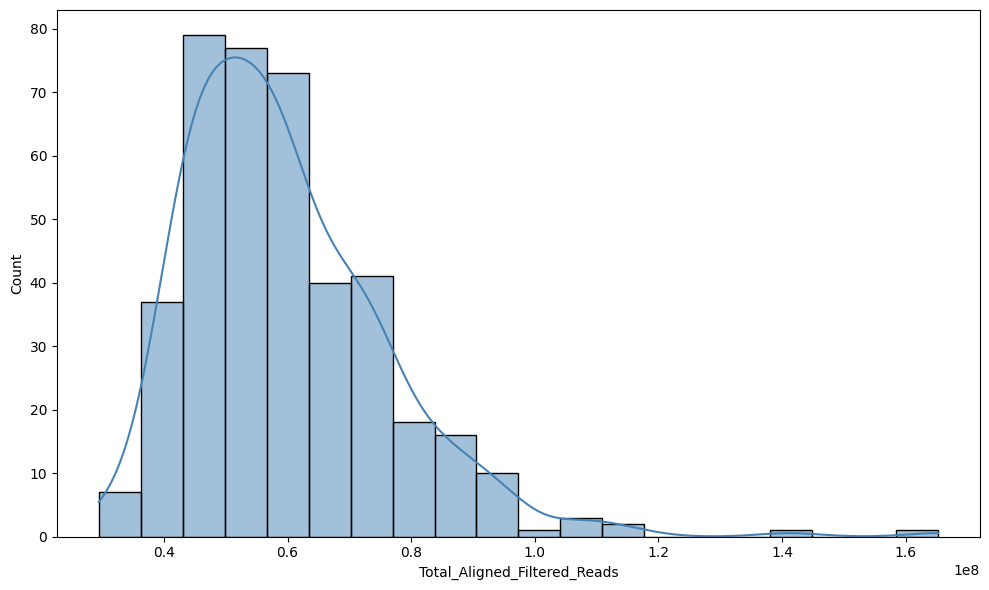

In [4]:
plt.figure(figsize=(10, 6))

# Create histogram with KDE
sns.histplot(df['Total_Aligned_Filtered_Reads'], kde=True, bins=20, color='steelblue')
# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig('../data/high_read_samples_hist.png', dpi=300)

# Show the plot
plt.show()

/scratch/ipykernel_1406613/3018907816.py:38: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_yticklabels([f'{int(x/1000000)}M' for x in current_values])


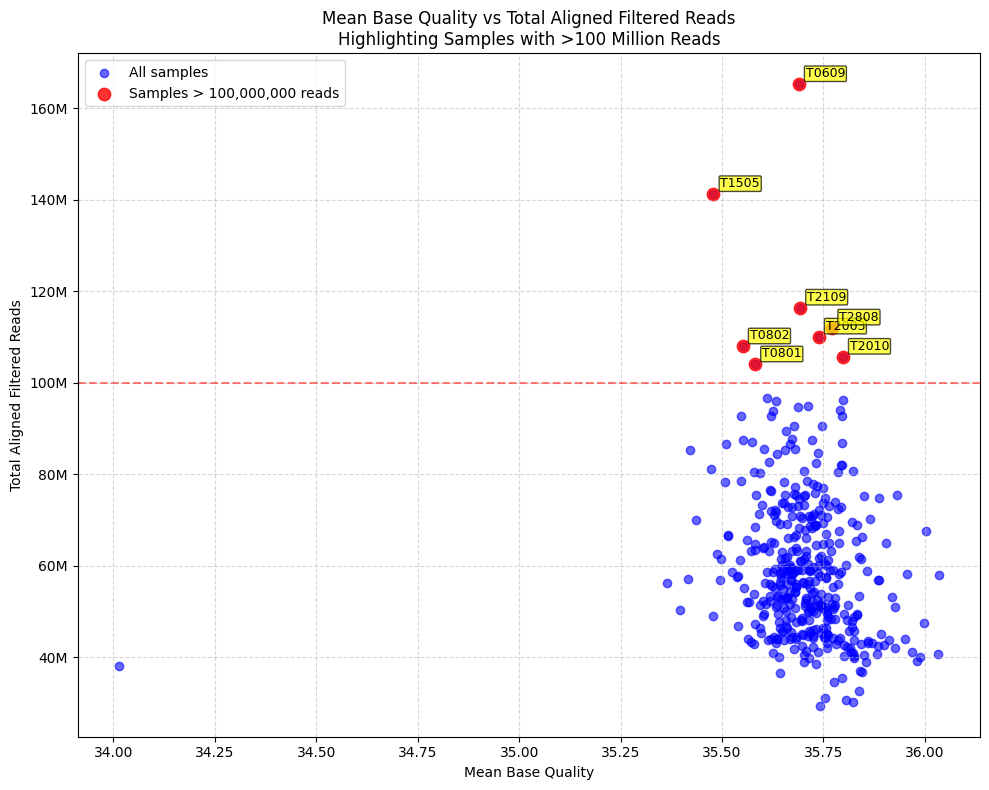

Saved 8 library IDs to ../data/atac_high_read_depth_samples.txt

Samples with more than 100,000,000 reads:
    Library  Total_Aligned_Filtered_Reads
67    T0609                     165250723
171   T1505                     141234737
247   T2109                     116430978
330   T2808                     112080014
229   T2003                     110106587
84    T0802                     107955696
236   T2010                     105698625
83    T0801                     104022757

Total number of samples with >100M reads: 8


In [5]:

# Identify samples with more than 100 million reads (1*10^8)
threshold = 1 * 10**8
high_read_samples = df[df['Total_Aligned_Filtered_Reads'] > threshold]

# Create a scatter plot
plt.figure(figsize=(10, 8))

# Plot all samples
plt.scatter(df['Mean_Base_Quality'], df['Total_Aligned_Filtered_Reads'], 
            alpha=0.6, color='blue', label='All samples')

# Highlight samples with high read counts
plt.scatter(high_read_samples['Mean_Base_Quality'], high_read_samples['Total_Aligned_Filtered_Reads'], 
            alpha=0.8, color='red', s=80, label=f'Samples > {threshold:,} reads')

# Add labels for high read count samples using Library as identifier
for idx, row in high_read_samples.iterrows():
    plt.annotate(
        str(row['Library']), 
        (row['Mean_Base_Quality'], row['Total_Aligned_Filtered_Reads']),
        xytext=(5, 5),
        textcoords='offset points',
        fontsize=9,
        bbox=dict(boxstyle="round,pad=0.1", fc="yellow", alpha=0.7)
    )

# Add labels and title
plt.xlabel('Mean Base Quality')
plt.ylabel('Total Aligned Filtered Reads')
plt.title('Mean Base Quality vs Total Aligned Filtered Reads\nHighlighting Samples with >100 Million Reads')

# Add a horizontal line at the threshold
plt.axhline(y=threshold, color='r', linestyle='--', alpha=0.5)

# Format y-axis to show numbers in millions
plt.ticklabel_format(style='plain', axis='y')
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels([f'{int(x/1000000)}M' for x in current_values])

# Add grid for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Add legend
plt.legend()

# Improve layout
plt.tight_layout()

# Save the figure
plt.savefig('../data/high_read_samples_plot.png', dpi=300)

# Show the plot
plt.show()

# Save just the Library IDs of high read samples to a txt file
output_file = '../data/atac_high_read_depth_samples.txt'
with open(output_file, 'w') as f:
    for library in high_read_samples['Library'].tolist():
        f.write(f"{library}\n")

print(f"Saved {len(high_read_samples)} library IDs to {output_file}")

# Print sample info to console
print(f"\nSamples with more than {threshold:,} reads:")
print(high_read_samples[['Library', 'Total_Aligned_Filtered_Reads']].sort_values(by='Total_Aligned_Filtered_Reads', ascending=False))
print(f"\nTotal number of samples with >100M reads: {len(high_read_samples)}")